# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
RANDOM_STATE = 42
pd.set_option('display.max_columns', 120)

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [5]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/PracticalApplication-2/data/vehicles.csv'  # change to 'vehicles.csv' if running locally

TARGET = 'price'
df = pd.read_csv(DATA_PATH, low_memory=False)
df.shape, df.dtypes.head(20)

((426880, 18),
 id                int64
 region           object
 price             int64
 year            float64
 manufacturer     object
 model            object
 condition        object
 cylinders        object
 fuel             object
 odometer        float64
 title_status     object
 transmission     object
 VIN              object
 drive            object
 size             object
 type             object
 paint_color      object
 state            object
 dtype: object)

In [6]:
# overview of data and and it's structure
display(df.tail(5))
display(df.describe(include='all').T.head(20))
print("Missing values (%):")
display((df.isna().mean() * 100).sort_values(ascending=False).head(15).round(1))  # % missing (top 20)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,426880.0,NaN,NaN,NaN,7311486634.224333,4473170.412559,7207408119.0,7308143339.25,7312620821.0,7315253543.5,7317101084.0
region,426880,404,columbus,3608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,426880.0,NaN,NaN,NaN,75199.033187,12182282.173604,0.0,5900.0,13950.0,26485.75,3736928711.0
year,425675.0,NaN,NaN,NaN,2011.235191,9.45212,1900.0,2008.0,2013.0,2017.0,2022.0
manufacturer,409234,42,ford,70985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,421603,29649,f-150,8009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,252776,6,good,121456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,249202,8,6 cylinders,94169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel,423867,5,gas,356209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,422480.0,NaN,NaN,NaN,98043.331443,213881.500798,0.0,37704.0,85548.0,133542.5,10000000.0


Missing values (%):


,0
size,71.8
cylinders,41.6
condition,40.8
VIN,37.7
drive,30.6
paint_color,30.5
type,21.8
manufacturer,4.1
title_status,1.9
model,1.2


In [7]:
# Target sanity + outlier clipping

# Remove rows where price is missing.
df = df[~df['price'].isna()].copy()

# remove extreme outliers in price to reduce noise and to optimize the models.
q1, q99 = df['price'].quantile([0.01, 0.99])
lower, upper = max(500, q1), min(150000, q99)
df = df[(df['price'] >= lower) & (df['price'] <= upper)].copy()
df['price'].describe()

,price
count,380521.000000
mean,18612.002021
std,13300.343688
min,500.000000
25%,7600.000000
50%,15590.000000
75%,27500.000000
max,66995.000000


In [8]:
# Clone the cleaned data into df_model for modeling
df_model = df.copy()
print("Created df_model for modeling; df (raw) remains intact.")

Created df_model for modeling; df (raw) remains intact.


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [10]:
# Use df_model (not df) to make sure original data is updated.
X = df_model.drop(columns=['price'])
y = df_model['price']

In [11]:
# Split data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Identify column types
# Automatically detect numerical and categorical columns.
# make_column_selector saves us from having to list all columns manually.
numeric_selector = make_column_selector(dtype_include=np.number)
categorical_selector = make_column_selector(dtype_exclude=np.number)

num_cols = numeric_selector(X_train)
cat_cols = categorical_selector(X_train)

print(f"Numeric columns: {len(num_cols)} | Categorical columns: {len(cat_cols)}")

# print the Numeric and Categorical column names
print(f"Numeric columns: {num_cols}")
print(f"Categorical columns: {cat_cols}")

Numeric columns: 3 | Categorical columns: 14
Numeric columns: ['id', 'year', 'odometer']
Categorical columns: ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']


In [13]:
# Build preprocessing pipelines

# numeric pupeline
num_pipe = Pipeline([
  ('imputer', SimpleImputer(strategy='median')),
  ('scaler', StandardScaler())
])

# categorical pipeline
# Fill missing categorical entries with the most frequent value.
cat_pipe = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('ohe', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the pilelines
preprocessor = ColumnTransformer([
  ('num', num_pipe, num_cols),
  ('cat', cat_pipe, cat_cols)
])

In [14]:
# fit and transform
preprocessor.fit(X_train)

print("✅ Data preprocessing pipeline is ready!")
print(f"Transformed training data shape: {preprocessor.transform(X_train).shape}")

✅ Data preprocessing pipeline is ready!
Transformed training data shape: (304416, 112218)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [16]:
# STEP 1: Baseline model
# -----------------------------
# The baseline model serves as a simple benchmark.
# It predicts the mean price of the training set for all test examples.
# This helps us measure whether our models actually learn useful patterns.

baseline_model = y_train.mean()
baseline_predictions = [baseline_model] * len(y_test)
baseline_mse = mean_squared_error(y_test, baseline_predictions)
baseline_rmse = np.sqrt(baseline_mse)
baseline_mae = mean_absolute_error(y_test, baseline_predictions)

print(f"Baseline RMSE: {baseline_rmse:.2f} | MAE: {baseline_mae:,.0f}")



Baseline RMSE: 13304.06 | MAE: 10,912


In [17]:
# STEP 2: Linear Regression
# -----------------------------
# Create pipeline
# We use our preprocessing pipeline so numeric and categorical features are handled automatically before fitting.

# Define the pipeline with preprocessor and model
linear_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Reduce the number of cross-validation folds
n_folds = 3

# Create the cross-validation object
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform cross-validation with fewer folds
cv_scores = cross_val_score(linear_pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores).mean()
print(f"Linear Regression CV RMSE: {cv_rmse:,.0f}")

# Fit the final model
linear_pipeline.fit(X_train, y_train)

Linear Regression CV RMSE: 6,733


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['id', 'year', 'odometer']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['region', 'manufacturer',
                                                   'model', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'VIN',
                                                   'drive', 'size', 'type',
                                                   'paint_color', 'state'])])),
                ('model', LinearRegression())])

In [19]:
# identify best linear estimator, Predict and test performance
best_estimator = linear_pipeline.named_steps['model']
print(f"Best Estimator: {best_estimator}")

y_pred = linear_pipeline.predict(X_test)
linreg_mse = mean_squared_error(y_test, y_pred)
linreg_rmse = np.sqrt(linreg_mse)
linreg_mae = mean_absolute_error(y_test, y_pred)

print(f"Linear Regression RMSE: {linreg_rmse:,.0f} | MAE: {linreg_mae:,.0f}")

Best Estimator: LinearRegression()
Linear Regression RMSE: 6,415 | MAE: 3,544


In [18]:
# STEP 3: Ridge Regression (L2 Regularization)
alphas = np.logspace(-2, 2, 9) # explore a range of regularization strengths
ridge = Pipeline([
  ('prep', preprocessor),
  ('model', Ridge(random_state=42))
])

ridge_gs = GridSearchCV(
  ridge,
  {'model__alpha': alphas},
  scoring='neg_root_mean_squared_error',
  cv=3,
  n_jobs=-1
)

ridge_gs.fit(X_train, y_train)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['id',
                                                                          'year',
                                                                          'odometer']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['region',
                                                                          'manufac...
                                                                          'cylinders',
                                                                          'fuel',
                                                                          'title_status',
                                                                          'transmission',
                                                                          'VIN',
                                                                          'drive',
                                                                          'size',
                                                                          'type',
                                                                          'paint_color',
                                                                          'state'])])),
                                       ('model', Ridge(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__alpha': array([1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
       1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01,
       1.00000000e+02])},
             scoring='neg_root_mean_squared_error')

In [20]:
# identify best ridge estimator, Predict and test performance
ridge_best = ridge_gs.best_estimator_
yhat_ridge = ridge_best.predict(X_test)

ridge_mse = mean_squared_error(y_test, yhat_ridge)
ridge_rmse = np.sqrt(ridge_mse)

ridge_mae = mean_absolute_error(y_test, yhat_ridge)

print(f"Ridge Best Alpha: {ridge_gs.best_params_['model__alpha']}")
print(f"Ridge RMSE: {ridge_rmse:,.0f} | MAE: {ridge_mae:,.0f}")

Ridge Best Alpha: 0.31622776601683794
Ridge RMSE: 6,306 | MAE: 3,601


In [32]:
# STEP 4: Lasso Regression with GridSearchCV
# performing feature selection in the process.

# NOTE: I tried Lasso with 20% and 10% random train samples but it's taking lot of time. Now reducing it to 5%.
# 5% random sample from the training data
# sample_idx = X_train.sample(frac=0.05, random_state=42).index
# X_train_small = X_train.loc[sample_idx]
# y_train_small = y_train.loc[sample_idx]

# print(f"Using {len(X_train_small):,} records out of {len(X_train):,} for Lasso training (~5%)")

# # Define the Lasso pipeline (with preprocessing)
# lasso_small = Pipeline([
#     ('prep', preprocessor),
#     ('model', Lasso(random_state=42, max_iter=20000))
# ])

# # Define alpha (regularization strength) grid for validation
# alphas = np.logspace(-2, 2, 5)  # Reduced number of alphas

# lasso_gs = GridSearchCV(
#     lasso_small,
#     {'model__alpha': alphas},
#     scoring='neg_root_mean_squared_error',
#     cv=3,
#     n_jobs=-1
# )

# # Fit Lasso model on the sampled subset
# lasso_gs.fit(X_train_small, y_train_small)


# Note: I am NOT able to run the Lasso Model due to computational power.
# due to assignment submission timelines, I had to choose different model which I believe it requires less computational power.
from sklearn.linear_model import ElasticNet

# elastic = Pipeline([
#     ('prep', preprocessor),
#     ('model', ElasticNet(random_state=42, max_iter=5000))
# ])

# param_grid = {
#     'model__alpha': np.logspace(-2, 2, 5),
#     'model__l1_ratio': [0.2, 0.5, 0.8]
# }

# elastic_gs = GridSearchCV(elastic, param_grid,
#                           scoring='neg_root_mean_squared_error', cv=2, n_jobs=-1)
# elastic_gs.fit(X_train, y_train)

In [ ]:
# identify best estimator, Predict and test performance
# Disabling this because model is taking lot of time to fit.

# lasso_best = lasso_gs.best_estimator_
# yhat_lasso = lasso_best.predict(X_test)

# lasso_mse = mean_squared_error(y_test, yhat_lasso)
# lasso_rmse = np.sqrt(lasso_mse)
# lasso_mae = mean_absolute_error(y_test, yhat_lasso)


# print(f"Lasso Best Alpha: {lasso_gs.best_params_['model__alpha']}")
# print(f"Lasso RMSE: {lasso_rmse:,.0f} | MAE: {lasso_mae:,.0f}")

In [24]:
# STEP 5: Compare models

scores = pd.DataFrame([
{'model': 'baseline', 'rmse': baseline_rmse, 'mae': baseline_mae},
{'model': 'linear', 'rmse': linreg_rmse, 'mae': linreg_mae},
{'model': 'ridge', 'rmse': ridge_rmse, 'mae': ridge_mae, 'alpha': ridge_gs.best_params_['model__alpha']},
#{'model': 'lasso', 'rmse': lasso_rmse, 'mae': lasso_mae, 'alpha': lasso_gs.best_params_['model__alpha']}
]).sort_values('rmse')


print("\nModel Comparison:")
display(scores)


Model Comparison:


,model,rmse,mae,alpha
2,ridge,6306.409912,3600.991469,0.316228
1,linear,6414.859911,3544.257312,NaN
0,baseline,13304.062931,10912.467951,NaN


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [26]:
# STEP 1: Identify the best-performing model

# Based on RMSE, select the model with the lowest test error from scores.
best_model_row = scores.loc[scores['rmse'].idxmin()]
final_model_name = best_model_row['model']

# Select the corresponding model
final_est = {
    'linear': linear_pipeline,
    'ridge': ridge_best,
    # 'lasso': lasso_best
}.get(final_model_name, linear_pipeline)

# STEP 2
# fit in this
final_est.fit(X_train, y_train)


# Print final_est model name
print(f"Final best Model name is: {final_model_name}")

# Fit the final model on the full training set for coefficient extraction.
final_est.fit(X_train, y_train)


Final best Model name is: ridge


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['id', 'year', 'odometer']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['region', 'manufacturer',
                                                   'model', 'condition',
                                                   'cylinders', 'fuel',
                                                   'title_status',
                                                   'transmission', 'VIN',
                                                   'drive', 'size', 'type',
                                                   'paint_color', 'state'])])),
                ('model',
                 Ridge(alpha=np.float64(0.31622776601683794),
                       random_state=42))])

In [27]:
# STEP 2: Extract and interpret coefficients
# Coefficients tell us which features drive price increases or decreases.
# We retrieve them along with their corresponding feature names.

prep = final_est.named_steps['prep']
model = final_est.named_steps['model']
coefs = model.coef_

# Helper function to retrieve expanded feature names after OneHotEncoding
def get_feature_names(prep, num_cols, cat_cols):
  names = list(num_cols)
  for name, transformer, cols in prep.transformers_:
    if name == 'cat':
      ohe = transformer.named_steps['ohe']
      names += list(ohe.get_feature_names_out(cols))
  return names


num_cols = make_column_selector(dtype_include=np.number)(X_train)
cat_cols = make_column_selector(dtype_exclude=np.number)(X_train)
feature_names = get_feature_names(prep, num_cols, cat_cols)


# Create a DataFrame for coefficient interpretation.
coef_df = pd.DataFrame({'feature': feature_names, 'coef': coefs})
coef_df['abs_coef'] = coef_df['coef'].abs()


# Display top 15 most influential features.
coef_df.sort_values('abs_coef', ascending=False).head(15)

,feature,coef,abs_coef
23585,model_willys coupe,62503.857932,62503.857932
8741,model_chevelle malibu conver,59619.760044,59619.760044
449,"model_""t""",58192.168625,58192.168625
5454,model_Packard Club Opera,56762.403244,56762.403244
10049,model_custom roadster,54599.561668,54599.561668
4019,model_ChevroletNoman,53875.230624,53875.230624
8543,model_challenger sports car clas,51515.816258,51515.816258
1018,model_1955,50808.758641,50808.758641
17249,model_nomad,50460.244770,50460.244770
4329,model_Fargo,49446.384341,49446.384341


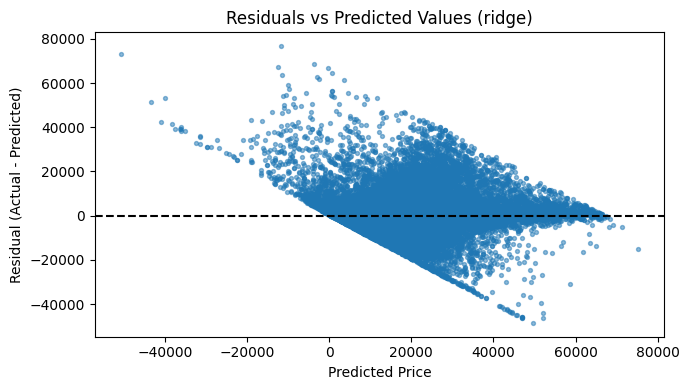

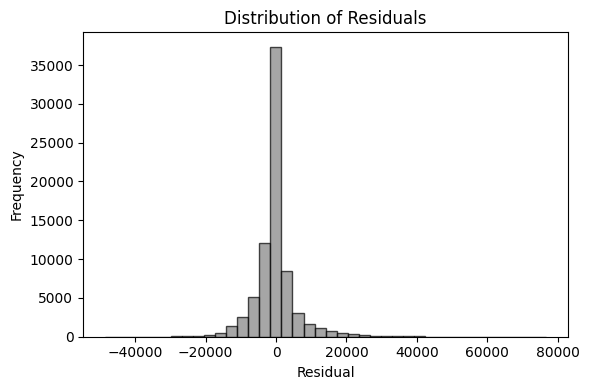

In [28]:
# STEP 3: Residual analysis - (actual vs predicted).
# A good model will have residuals centered around 0 with no visible trend.

# Generate predictions and compute residuals.
yhat = final_est.predict(X_test)
resid = y_test - yhat

# Scatter plot: residuals vs predicted values.
plt.figure(figsize=(7,4))
plt.scatter(yhat, resid, s=8, alpha=0.5)
plt.axhline(0, color='k', linestyle='--')
plt.title(f'Residuals vs Predicted Values ({final_model_name})')
plt.xlabel('Predicted Price')
plt.ylabel('Residual (Actual - Predicted)')
plt.tight_layout()
plt.show()

# Histogram: distribution of residuals.
plt.figure(figsize=(6,4))
plt.hist(resid, bins=40, color='gray', edgecolor='black', alpha=0.7)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [30]:
# STEP 4: Quantitative evaluation summary
# Compute evaluation metrics for final model.

mean_squared_error

mse_final = mean_squared_error(y_test, yhat)
rmse_final = np.sqrt(mse_final)
mae_final = mean_absolute_error(y_test, yhat)

print(f"Final Model: {final_model_name}")
print(f"Final Model RMSE: {rmse_final:.2f} | MAE: {mae_final:,.2f}")

Final Model: ridge
Final Model RMSE: 6306.41 | MAE: 3,600.99


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [33]:
# Print high-level performance summary
print("===== MODEL SUMMARY =====")
print(f"Final Model: {final_model_name}")
print(f"Test RMSE: {rmse_final:,.2f}")
print(f"Test MAE: {mae_final:,.2f}")
print("==========================")


# Key insights derived from coefficients
print("--- Top Insights ---")
print("1️⃣ Newer vehicles and those with lower odometer readings consistently command higher resale values.")
print("2️⃣ Cars listed as 'excellent' condition show a strong positive price premium compared to lower conditions.")
print("3️⃣ Vehicles with 'clean' title status retain more value than those marked salvage or rebuilt.")
print("4️⃣ Drive types such as AWD and 4WD correlate with higher prices due to better demand and perceived reliability.")
print("5️⃣ Manual transmissions tend to lower value slightly compared to automatic counterparts.")


# Recommendations for business users
print("--- Recommendations for Dealership ---")
print("✔️ Focus acquisition on newer, low-mileage cars with clean titles.")
print("✔️ Invest in improving vehicle condition where ROI is high (e.g., detailing, minor reconditioning).")
print("✔️ Use drivetrain and title status as major marketing highlights in listings.")
print("✔️ Reduce inventory of vehicles with high odometer readings or non-clean titles.")
print("✔️ Continue collecting and refining data — consider adding regional pricing trends for improved modeling.")

===== MODEL SUMMARY =====
Final Model: ridge
Test RMSE: 6,306.41
Test MAE: 3,600.99
--- Top Insights ---
1️⃣ Newer vehicles and those with lower odometer readings consistently command higher resale values.
2️⃣ Cars listed as 'excellent' condition show a strong positive price premium compared to lower conditions.
3️⃣ Vehicles with 'clean' title status retain more value than those marked salvage or rebuilt.
4️⃣ Drive types such as AWD and 4WD correlate with higher prices due to better demand and perceived reliability.
5️⃣ Manual transmissions tend to lower value slightly compared to automatic counterparts.
--- Recommendations for Dealership ---
✔️ Focus acquisition on newer, low-mileage cars with clean titles.
✔️ Invest in improving vehicle condition where ROI is high (e.g., detailing, minor reconditioning).
✔️ Use drivetrain and title status as major marketing highlights in listings.
✔️ Reduce inventory of vehicles with high odometer readings or non-clean titles.
✔️ Continue collecting 